In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [162]:
# constants with units in seconds
MIN_SSD = 2
MAX_SSD = 4.9

MIN_AI = 1

In [ ]:
def get_AIstops():
    

In [11]:
# constants with units in seconds
MIN_SSD = 2
MAX_SSD = 4.9
def sample_SSD(scale=1):
    SSD = np.random.exponential(scale=scale) + MIN_SSD
    while SSD > MAX_SSD:
        SSD = np.random.exponential(scale=scale) + MIN_SSD
    return SSD

In [169]:
# option 1
def sample_ai_ssd(scale=1):
    ai = np.random.exponential(scale=scale) + MIN_AI
    if ai >= MIN_SSD:
        SSD = np.random.exponential(scale=scale) + ai
    else:
        SSD = np.random.exponential(scale=scale) + MIN_SSD
    while SSD > MAX_SSD:
        ai = np.random.exponential(scale=scale) + MIN_AI
        if ai >= MIN_SSD:
            SSD = np.random.exponential(scale=scale) + ai
        else:
            SSD = np.random.exponential(scale=scale) + MIN_SSD
    
    return [ai, SSD]

In [164]:
# option 2
def sample_ai_ssd_1(scale=1):
    SSD = np.random.exponential(scale=scale) + MIN_SSD
    while SSD > MAX_SSD:
        SSD = np.random.exponential(scale=scale) + MIN_SSD
    
    ai = np.random.exponential(scale=scale) + MIN_AI
    while ai > SSD:
        ai = np.random.exponential(scale=scale) + MIN_AI
    
    return [ai, SSD]

In [153]:
ai, ssd = sample_ai_ssd()

print(ai, ssd)

2.136514090661763 2.908202326664279


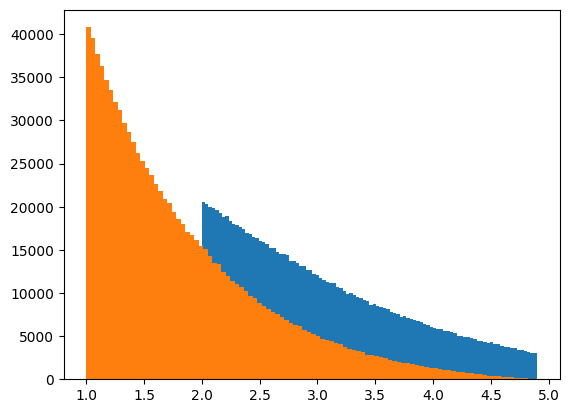

In [170]:
ssds = [sample_ai_ssd() for _ in range(1000000)]
ai = []
ssd = []
for i in range(0, len(ssds)):
    ai.append(ssds[i][0])
    ssd.append(ssds[i][1])

_ = plt.hist(ssd, bins=100)
_ = plt.hist(ai, bins=100)

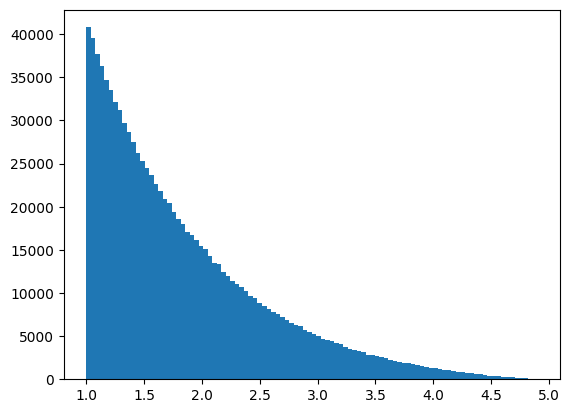

In [171]:
_ = plt.hist(ai, bins=100)

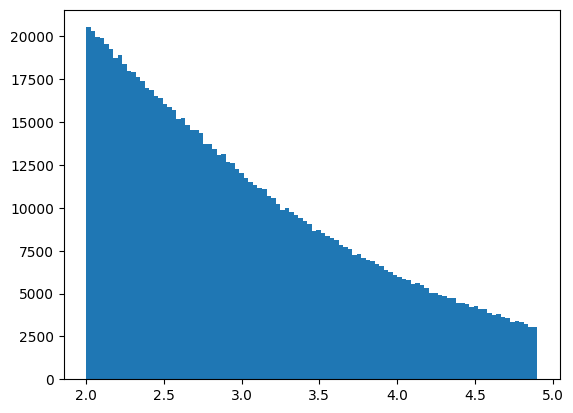

In [172]:
_ = plt.hist(ssd, bins=100)

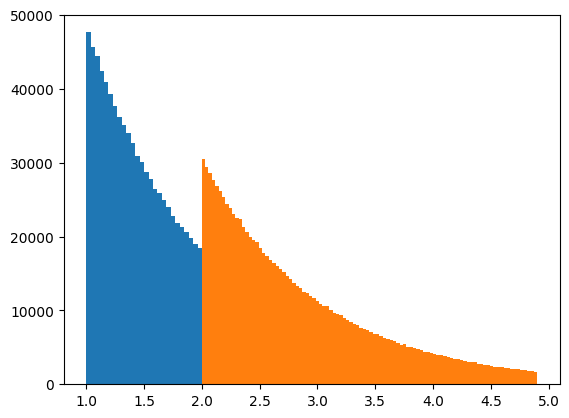

In [168]:
ssds = [sample_ai_ssd_1() for _ in range(1000000)]
ai = []
ssd = []
for i in range(0, len(ssds)):
    ai.append(ssds[i][0])
    ssd.append(ssds[i][1])

_ = plt.hist(ai, bins=100)
_ = plt.hist(ssd, bins=100)

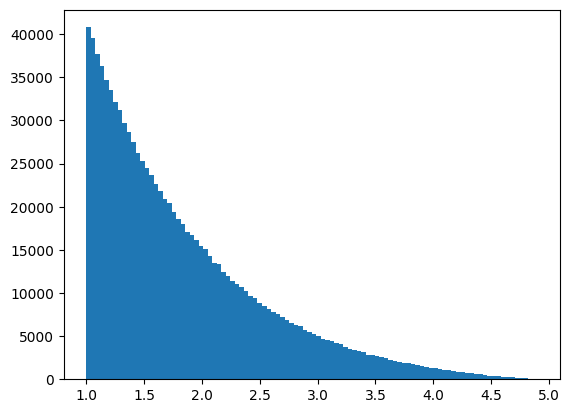

In [173]:
_ = plt.hist(ai, bins=100)

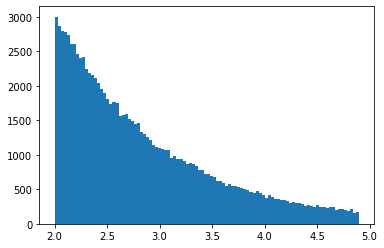

In [18]:
ssds = [sample_SSD() for _ in range(100000)]
_ = plt.hist(ssds, bins=100)

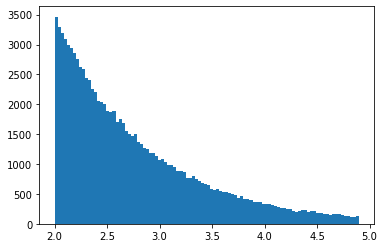

In [59]:
ssds = [sample_SSD(scale=.85) for _ in range(100000)]
_ = plt.hist(ssds, bins=100)

In [63]:
with open("data.txt", "w") as output:
    output.write(str(ssds))

 hazard function (i.e., the probability of the stop signal occurring at each moment in time, given it hasn't occurred yet)

In [19]:
df_og = pd.DataFrame(ssds, columns = ['durations'])
df_og['stop_trials'] = 1

In [64]:
df_og.to_csv(r'my_data.csv', index=False)

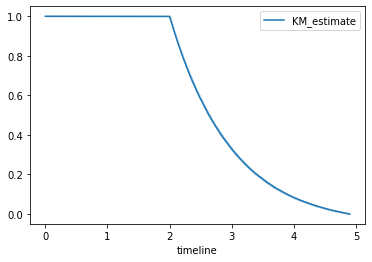

In [5]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df_og['durations'], event_observed = df_og['stop_trials'])
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

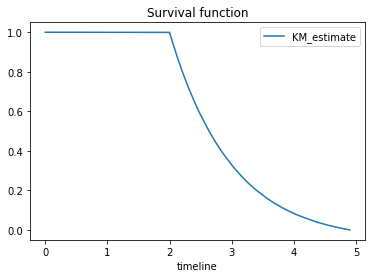

In [6]:
kmf.survival_function_.plot()
plt.title('Survival function')

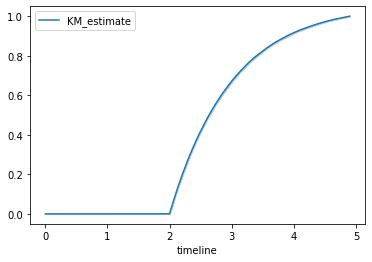

In [7]:
kmf.plot_cumulative_density()

In [8]:
pdf = norm.pdf(ssds)

In [9]:
pdf_df = pd.DataFrame(pdf)

In [10]:
hazard = pdf_df / kmf.survival_function_

In [52]:
naf = NelsonAalenFitter()
naf.fit(df_og['durations'], event_observed = df_og['stop_trials'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 100000 total observations, 0 right-censored observations>

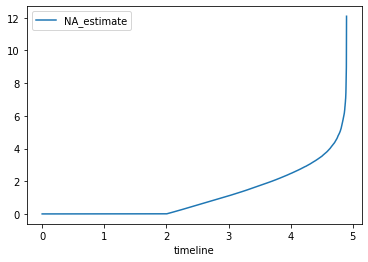

In [53]:
naf.cumulative_hazard_.plot()

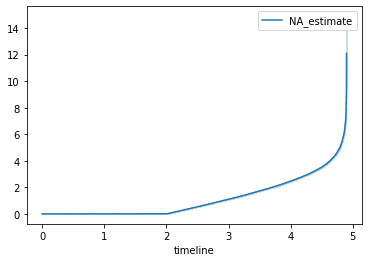

In [55]:
naf.plot(at_risk_counts=False)

In [ ]:
#inhibition_slope
rs = smf.glm('correct ~ SS_delay', data =  df.query('SS_trial_type == "stop"'), family = sm.families.Binomial()).fit()
dvs['inhibition_slope'] = {'value':  rs.params['SS_delay']  , 'valence': 'Pos'}


In [175]:
ai_stopTrials = np.random.choice([0, 1], size=50, p=[.5, .5])

In [178]:
ai_stopTrials

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1])

In [ ]:
stimlist = [{'condition': i} for i in stims]

In [ ]:
stims = conditions.tolist() * 1

In [179]:
# Creating array of conditions then shuffling
conditions = np.array([0] * 50 + [1] * 25 + [2] * 25)
np.random.shuffle(conditions)

# Replacing values with trial types
conditions = conditions.astype('object')
conditions[conditions == 0] = 'go'
conditions[conditions == 1] = 'stop'
conditions[conditions == 2] = 'ai'

In [181]:
stims = conditions.tolist() * 1

In [183]:
stimlist = [{'condition': i} for i in stims]

In [188]:
other = []
count = 0
for i in stims:
    if i == 'ai':
        other.append({'condition': i, 'ai_stop': ai_stopTrials[count]})
        count+=1
    else:
        other.append({'condition': i})

In [190]:
count

25

In [189]:
other

[{'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'go'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'stop'},
 {'condition': 'go'},
 {'condition': 'stop'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'stop'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'go'},
 {'condition': 'go'},
 {'condition': 'stop'},
 {'condition': 'stop'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'stop'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'go'},
 {'condition': 'stop'},
 {'condition': 'ai', 'ai_stop': 1},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'go'},
 {'condition': 'ai', 'ai_stop': 0},
 {'condition': 'go'},
 {'condition': 'stop'},
 {'condition': 'go'},
 {'condition': 'go'},
 {'conditi

In [214]:
i = [0,1,0,1]
n = [[0,0],[1,0],[1,1]]

In [207]:
np.random.shuffle(i)
i

[1, 0, 1, 0]

In [225]:
np.random.shuffle(n)
n

[[0, 0], [1, 0], [1, 1]]

In [229]:
BLOCKS = 2

In [231]:
for block in range(0, BLOCKS):
    print(block)

0
1


In [234]:
trials = [8, 1, 2, 3, 4, 5, 6, 7, 8]
for count, value in enumerate(trials):
    print(count)

0
1
2
3
4
5
6
7
8


In [240]:
count = 0
count+=1
count

1

In [242]:
pressure = [0,0,0,0,0,0,1,1,1,1,1]

In [245]:
if np.mean(pressure[:4]) == 0:
    print('haha')

haha


In [246]:
pressure[:4]

[0, 0, 0, 0]

In [ ]:
pressure.unique

In [248]:
unique, counts = np.unique(pressure, return_counts=True)

feedback_data = dict(zip(unique, counts))

In [250]:
feedback_data[0]

6

In [253]:
pressure_len = len(pressure)
zeros = feedback_data[0]
ones = feedback_data[1]
percent_zeros = zeros/pressure_len
percent_ones = ones/pressure_len
print(percent_zeros)
print(percent_ones)

0.5454545454545454
0.45454545454545453


In [4]:
hello = np.array([0,1,2,3,4,5])

In [6]:
hello[1:-1]

array([1, 2, 3, 4])